In [3]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd 

In [12]:
filePath = "data/data.csv" 
spotify_df = pd.read_csv(filePath)
spotify_df = spotify_df.set_index("id")
spotify_df.head(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
id,,,,,,,,,,,,,,,,,,
0cS0A1fUEUd1EW3FcF8AEI,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
0hbkKFIJm7Z05H8Zl9w30f,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
11m7laMUgmOKqI3oYzuhne,0.993000,['Mamie Smith'],0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
19Lc5SfJJ5O1oaxY0fpwfh,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
2hJjbsLCytGsnAHfdsLejp,0.295000,['Mixe'],0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [13]:
spotify_df_features = spotify_df[["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", "loudness", "speechiness", "tempo", "valence"]]

In [18]:
scaler = StandardScaler()
spotify_scaler = scaler.fit(spotify_df_features) # save later 
spotify_df_scaled = spotify_scaler.transform(spotify_df_features)

In [31]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42
}

n_cluster_start = 2
n_cluster_end = 25 

sse = []
silhouette_coefficients = []
for i in range(n_cluster_start, n_cluster_end): 
    kmeans = KMeans(n_clusters=i, **kmeans_kwargs)
    kmeans.fit(spotify_df_scaled)
    sse.append(kmeans.inertia_)
    score = silhouette_score(spotify_df_scaled, kmeans.labels_) 
    silhouette_coefficients.append(score)

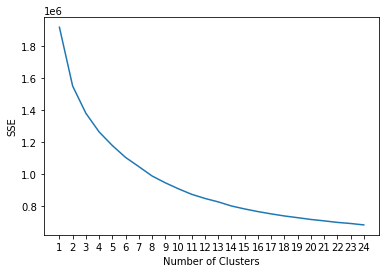

In [35]:
plt.plot(range(n_cluster_start, n_cluster_end), sse)
plt.xticks(range(n_cluster_start, n_cluster_end))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [37]:
kl = KneeLocator(range(n_cluster_start,n_cluster_end), sse, curve="convex", direction="decreasing")
kl.elbow

8

In [ ]:
plt.plot(range(n_cluster_start, n_cluster_end), silhouette_coefficients)
plt.xticks(range(n_cluster_start, n_cluster_end))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
# DB Scan 
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3)
dbscan.fit(spotify_df_scaled)


In [43]:
kmeans = KMeans(n_clusters=8, **kmeans_kwargs)
kmeans.fit(spotify_df_scaled)

KMeans(random_state=42)

In [44]:
from joblib import dump, load
# export scaler 
dump(spotify_scaler, "scaler.joblib")
# export model
dump(kmeans, "kmeans.joblib")

['kmeans.joblib']